# **Project Name** - Cell Phone Price Prediction Model

##### **Project Type**    - Classification

# Business Case Scenario


Bob has started his own mobile company and intends to challenge major competitors. However, he lacks the expertise to estimate the prices of the mobile devices his company manufactures. Recognizing the complexity of the competitive mobile phone market, assumptions won't suffice. To address this challenge, he gathers sales data from various mobile phone companies.

Bob aims to discern the relationship between a mobile phone's features (e.g., RAM, internal memory, etc.) and its selling price. Unfortunately, he lacks proficiency in machine learning and seeks your assistance to overcome this obstacle.

In this problem, the goal is not to predict the exact price but to determine a price range that indicates the relative cost of the mobile phone.

## Project Overview:

Objective: Develop a machine learning model for predicting the price range of cell phones based on various features.

Task: Perform multiclassification to categorize cell phones into different price ranges 

# **Problem Statement**


**In the competitive mobile phone market, companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Dataset Loading

In [5]:
#Loading Mobile Data CSV file
data=pd.read_csv(r"C:\Users\91961\Downloads\datasets_11167_15520_train.csv")

# Basis checks

### 1.Dataset First View

In [6]:
# Dataset First Look From Top Five Rows & Columns
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### 2.Dataset Last View

In [7]:
# Dataset First Look From Bottom Five Rows & Columns
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### 3. Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
data.shape

(2000, 21)

### 4. Dataset Information

In [9]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### 5.Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicated_values_count = len(data[data.duplicated()])
duplicated_values_count

0

### 6. Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Observations About Dataset


**1**.The dataset contains 21 columns and 2000 rows

**2**.No duplicate values present in the dataset.

**3**.No missing values present in the dataset.

## ***2. Understanding Your Variables / columns***

In [12]:
# Daaset Columns
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
#Length of columns
len(data.columns)

21

In [43]:
# Dataset Describe
#Transpose of data Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.17700,4.150094,0.0,1.00,3.0,7.00,16.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## Variables/columns Description

**Battery_power** - Total energy a battery can store in one time measured in mAh.

**Blue** - Has bluetooth or not.

**Clock_speed** - speed at which microprocessor executes instructions.

**Dual_sim** - Has dual sim support or not.

**Fc** - Front Camera mega pixels.

**Four_g** - Has 4G or not.

**Int_memory** - Internal Memory in Gigabytes.

**M_dep** - Mobile Depth in cm.

**Mobile_wt** - Weight of mobile phone.

**N_cores** - Number of cores of processor.

**Pc** - Primary Camera mega pixels.

**Px_height** - Pixel Resolution Height.

**Px_width** - Pixel Resolution Width.

**Ram** - Random Access Memory in Mega.

**Touch_screen** - Has touch screen or not.

**Wifi** - Has wifi or not.

**Sc_h** - Screen Height of mobile in cm.

**Sc_w** - Screen Width of mobile in cm.

**Talk_time** - longest time that a single battery charge will last when you are.

**Three_g** - Has 3G or not.

**Wifi** - Has wifi or not.

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(High Cost),3(Very High cost).

## Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for column in data.columns:
    unique_values = data[column].unique()
print(unique_values)

[1 2 3 0]


In [16]:
#Checking Unique Values
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

##  3. Exploratory Data Analysis

# Univariate Analysis

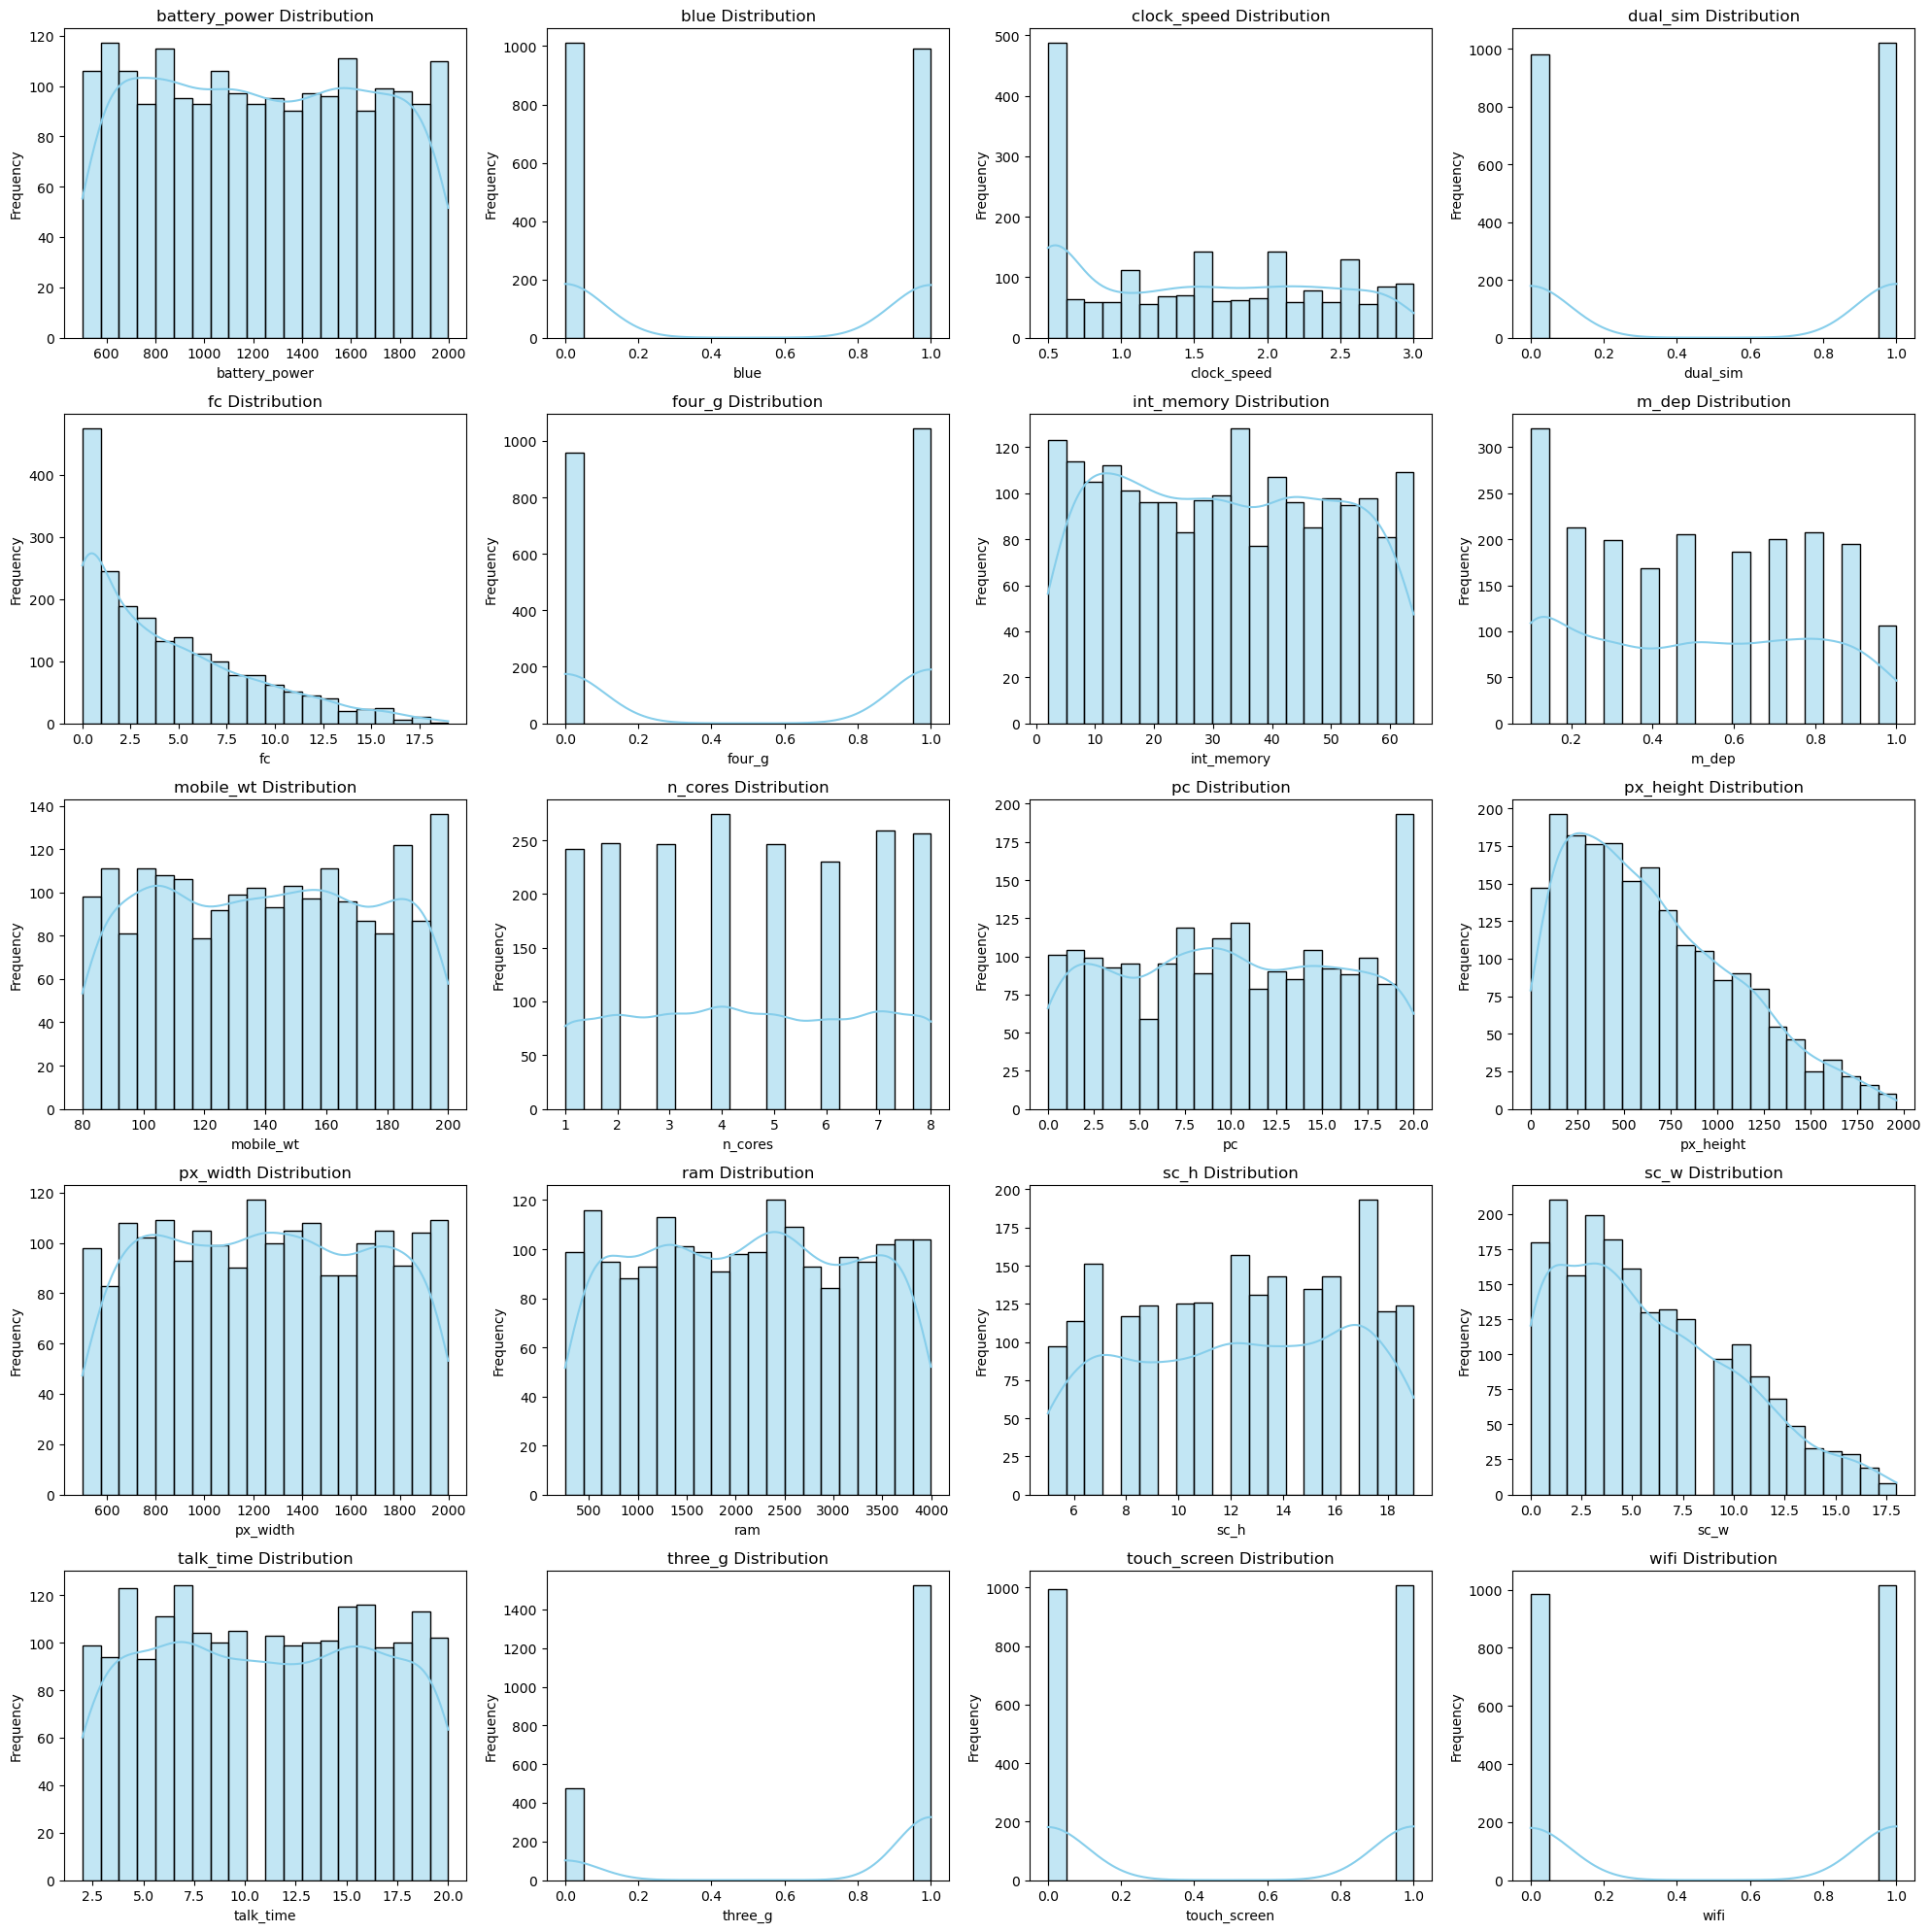

In [17]:
# Assuming 'data' is your DataFrame

# Create a 5x4 subplot
fig, axes = plt.subplots(5, 4, figsize=(20, 20), sharex=False, sharey=False)

# Columns for univariate analysis
columns_to_analyze = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                       'touch_screen', 'wifi']

# Loop through columns and create subplots
for i, column in enumerate(columns_to_analyze):
    row_index = i // 4
    col_index = i % 4
    
    if data[column].dtype == 'O':  # Check if the column is categorical
        sns.countplot(data[column], palette='viridis', ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Distribution of {column}')
        axes[row_index, col_index].set_xlabel(column)
        axes[row_index, col_index].set_ylabel('Count')
    else:  # Assume the column is numeric
        sns.histplot(data[column], bins=20, kde=True, color='skyblue', ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'{column} Distribution')
        axes[row_index, col_index].set_xlabel(column)
        axes[row_index, col_index].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### Observations

 *As per Univariate analysis data looks fine, did not see any exterme outliers*

# Bi-Variate Analysis

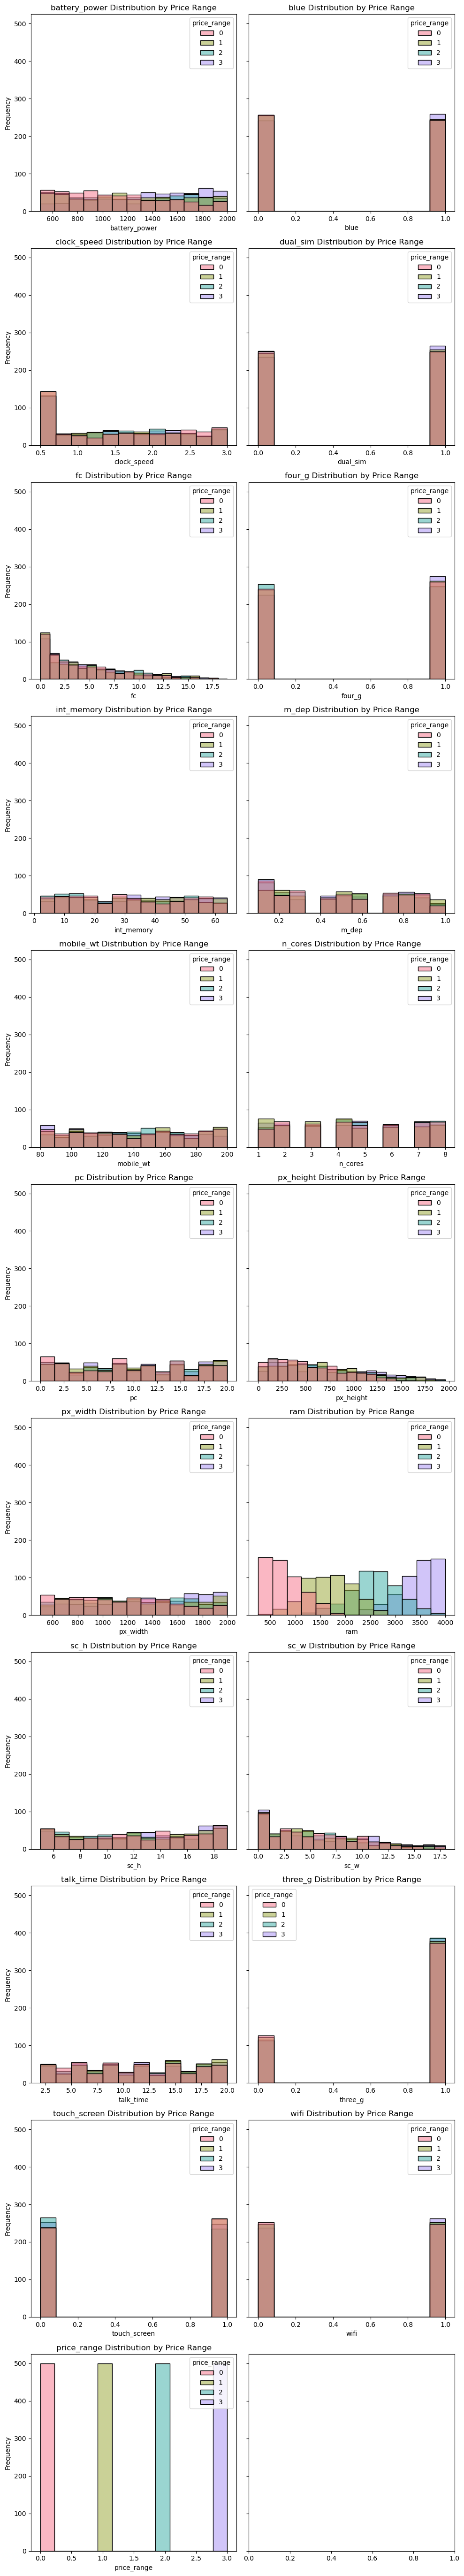

In [18]:
# Assuming 'data' is your DataFrame

# Define a custom color palette
palette = sns.color_palette("husl", n_colors=4)

# Get numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate the number of subplots needed
num_subplots = len(numeric_columns)

# Determine the number of rows and columns for the subplot grid
num_rows = (num_subplots // 2) + (num_subplots % 2)
num_cols = 2

# Adjust the figure size for a square shape with more height
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows), sharey=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through each numeric column for bivariate analysis
for i, column in enumerate(numeric_columns):
    # Determine the row and column indices
    row_index = i // num_cols
    col_index = i % num_cols

    # Histogram without KDE for 'price_range' and other columns
    sns.histplot(x=column, hue='price_range', data=data, ax=axes[i], common_norm=False, palette=palette)
    axes[i].set_title(f'{column} Distribution by Price Range')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### Observations

*According to the bivariate analysis, RAM shows a high correlation with the price range, and battery power exhibits a correlation with the price range*

# Heatmap

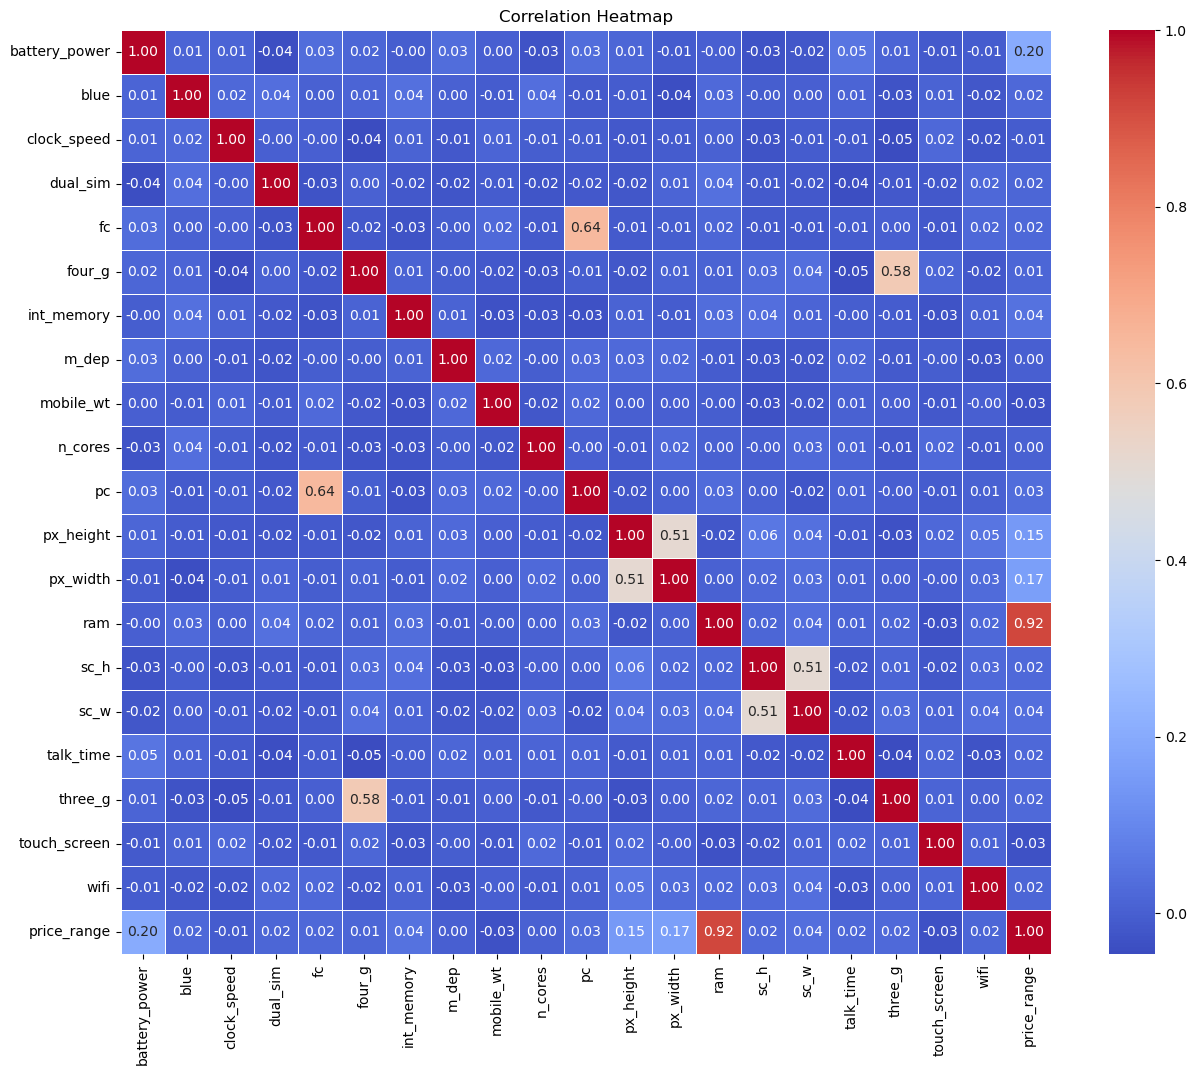

In [19]:
# Assuming 'data' is your DataFrame

# Select the columns for the heatmap
columns_for_heatmap = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                       'touch_screen', 'wifi', 'price_range']

# Create a correlation matrix
correlation_matrix = data[columns_for_heatmap].corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Observations

*According to the heatmap, there are no high correlations between predictors*

## 4.Feature Engineering & Data Pre-processing

### 1. Handling Missing Values

In [20]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Observations

 *No missing value available.*

### 2. Handling Outliers

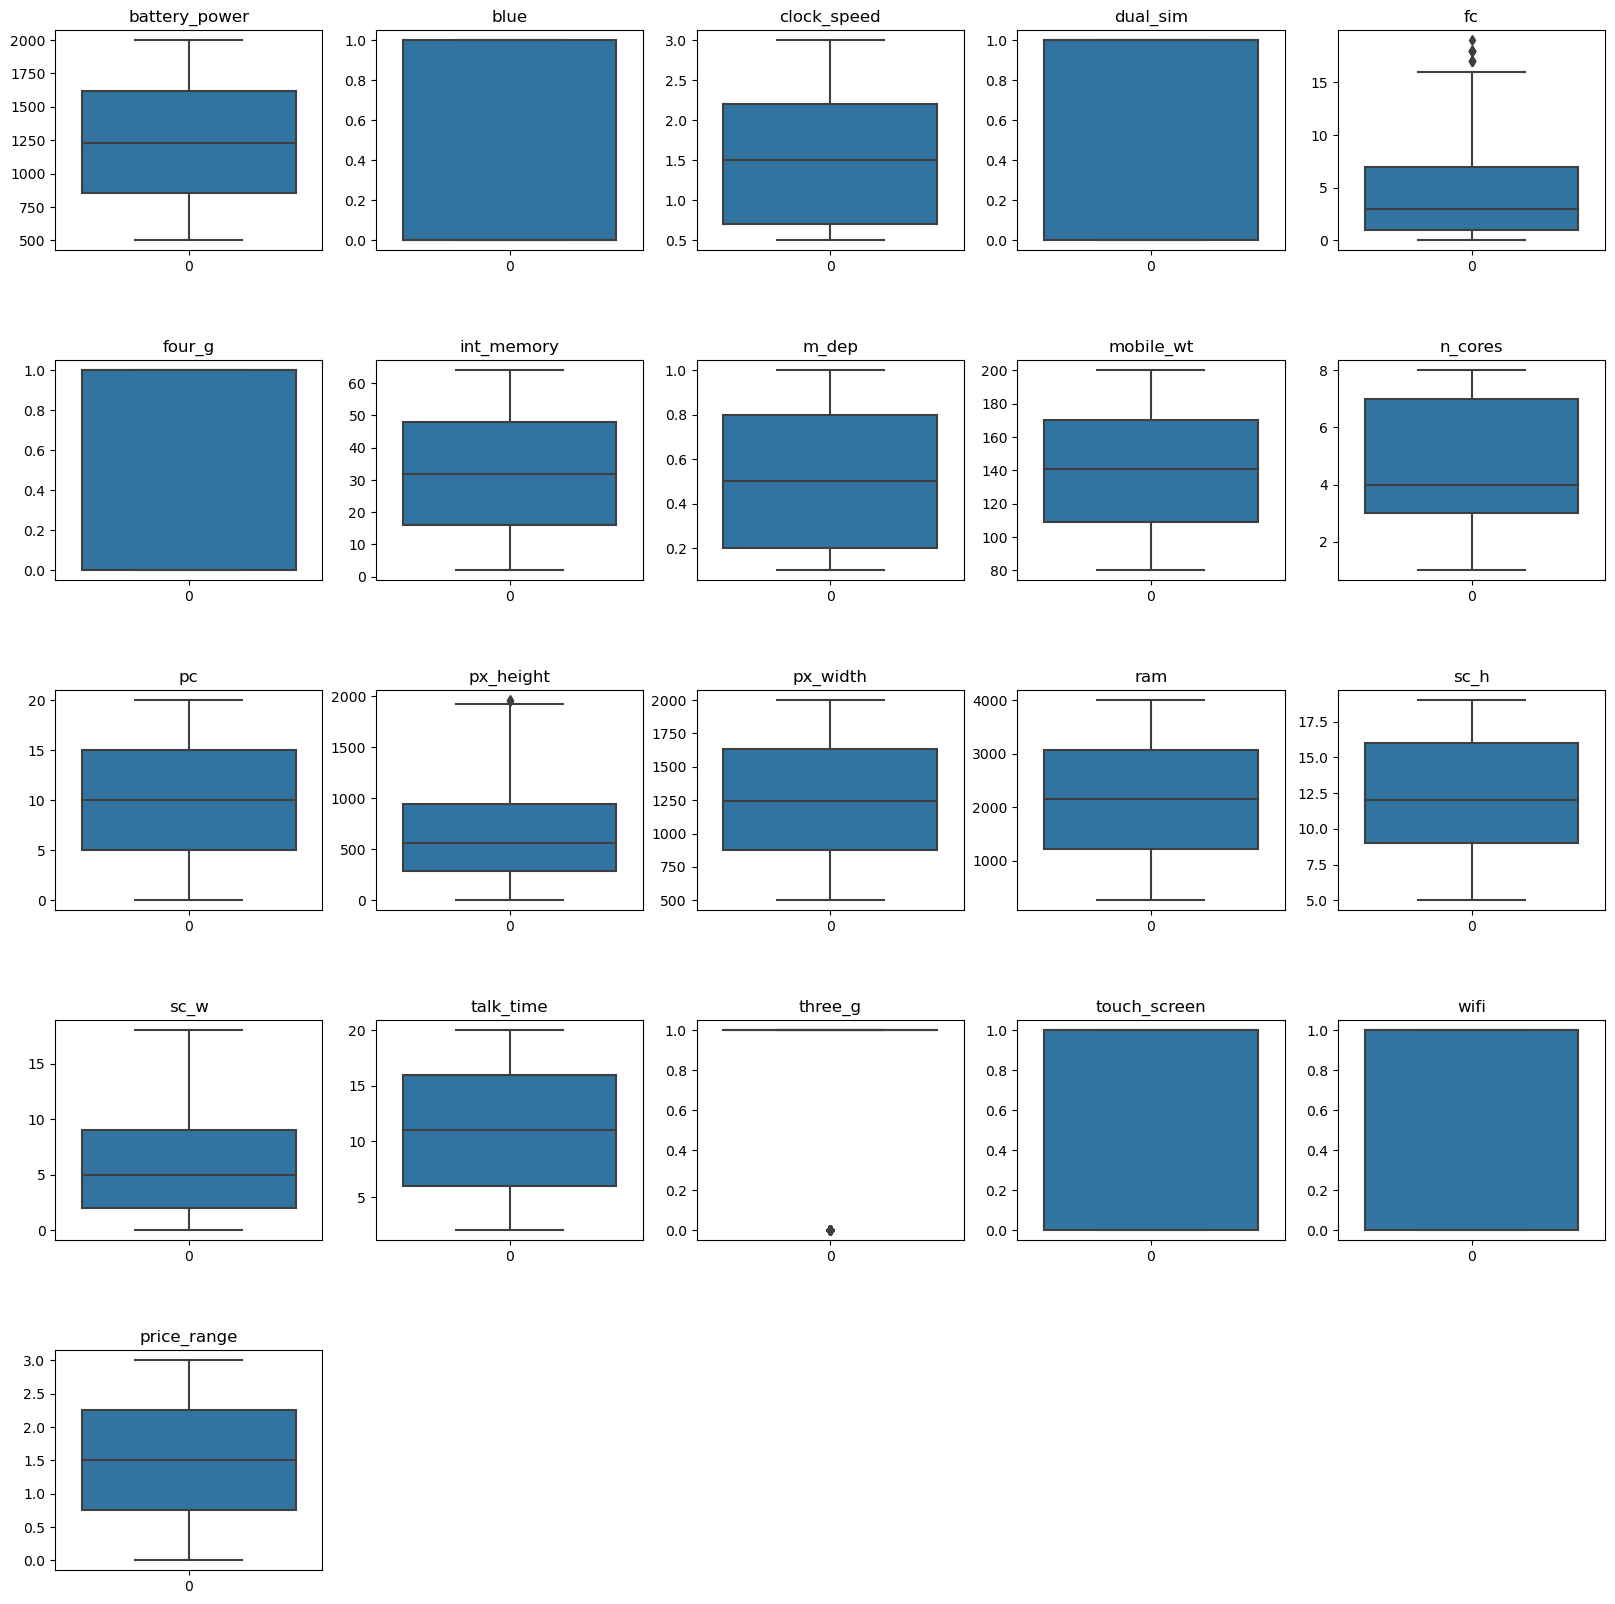

In [21]:
#Handling Outliers

# Set the figure size to 20x20
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in data.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(data[item])

  # Add the column name to the subplot title
  plt.title(item)

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")


## Observations

We have outlier in FC column and below code is to handle the outliers

### 3. Example for imputation instead of removal

In [22]:
# Assuming 'data' is your DataFrame
Q1 = data['fc'].quantile(0.25)
Q3 = data['fc'].quantile(0.75)
IQR = Q3 - Q1

# Example for imputation instead of removal
median_value = data['fc'].median()
data['fc'] = np.where((data['fc'] < Q1 - 1.5 * IQR) | (data['fc'] > Q3 + 1.5 * IQR), median_value, data['fc'])

In [23]:
data['fc']

0        1.0
1        0.0
2        2.0
3        0.0
4       13.0
        ... 
1995     0.0
1996     0.0
1997     1.0
1998     4.0
1999     5.0
Name: fc, Length: 2000, dtype: float64

### 4. Check Dataset Balanced or Imbalanced

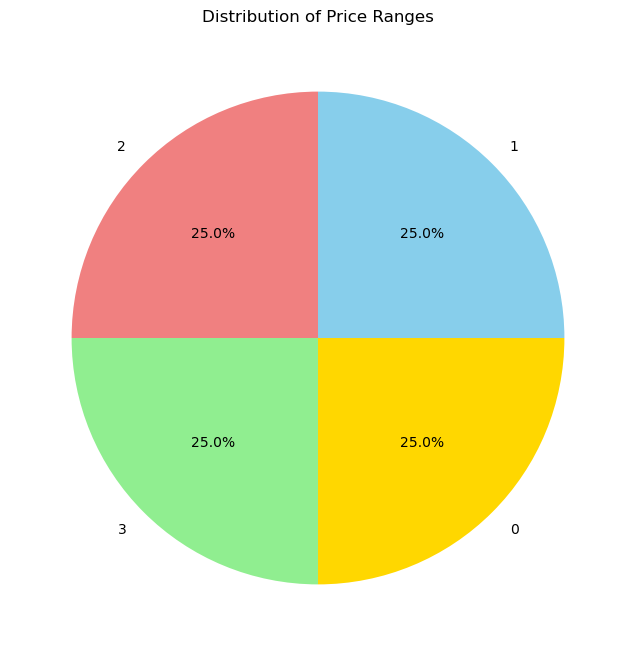

In [24]:
price_range_counts = data['price_range'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Distribution of Price Ranges')
plt.show()

### Observations

*As per Pie Chart above, the dataset is balanced*

### 6. Data Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler


# Assuming 'data' is your DataFrame

# Separate 'price_range' column
price_range_column = data['price_range']
data_without_price_range = data.drop('price_range', axis=1)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data (excluding 'price_range') using Min-Max scaling
scaled_data_without_price_range = pd.DataFrame(scaler.fit_transform(data_without_price_range), columns=data_without_price_range.columns)

# Merge scaled data (excluding 'price_range') with 'price_range' column
data_scaled = pd.concat([scaled_data_without_price_range, price_range_column], axis=1)

# Display the first few rows of the scaled data
print(data_scaled.head())

   battery_power  blue  clock_speed  dual_sim      fc  four_g  int_memory  \
0       0.227789   0.0         0.68       0.0  0.0625     0.0    0.080645   
1       0.347361   1.0         0.00       1.0  0.0000     1.0    0.822581   
2       0.041416   1.0         0.00       1.0  0.1250     1.0    0.629032   
3       0.076152   1.0         0.80       0.0  0.0000     0.0    0.129032   
4       0.881764   1.0         0.28       0.0  0.8125     1.0    0.677419   

      m_dep  mobile_wt   n_cores  ...  px_height  px_width       ram  \
0  0.555556   0.900000  0.142857  ...   0.010204  0.170895  0.612774   
1  0.666667   0.466667  0.285714  ...   0.461735  0.993324  0.634687   
2  0.888889   0.541667  0.571429  ...   0.644388  0.811749  0.627205   
3  0.777778   0.425000  0.714286  ...   0.620408  0.858478  0.671566   
4  0.555556   0.508333  0.142857  ...   0.616327  0.475300  0.308658   

       sc_h      sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0  0.285714  0.388889   0.9

In [26]:
data_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.0625,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.0000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.1250,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.0000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.8125,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1


### 7. Data Splitting

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data_scaled' is your DataFrame after Min-Max scaling

# Split the data into features (X) and target variable (y)
X = data_scaled.drop('price_range', axis=1)
y = data_scaled['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
X_train.shape

(1600, 20)

In [45]:
X_test.shape

(400, 20)

## 5. ML Model Implementation

### ML Model - 1

 ### LOGISTIC REGRESSION

In [58]:
model = LogisticRegression(max_iter=1000, random_state=25)

In [59]:
# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=25)

In [60]:
# Predictions on the testing data
y_pred = model.predict(X_test)

In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

In [62]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report_output)

Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.91      0.95      0.92        91
           2       0.91      0.84      0.87        92
           3       0.95      0.96      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



### Insights

Based on the Logistic Regression, Training Data and evaluates its Performance on the Testing Data, Providing a Classification Report and Accuracy at 94%

## ML Model - 2

### XGBoost (Extreme Gradient Boosting)

In [35]:
from xgboost import XGBClassifier

In [36]:
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
# Prediction
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

In [38]:
# Evaluation metrics for Test set
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.85      0.92      0.88        91
           2       0.87      0.84      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



### Insights

Based on the XGBoost, The XGBoost model achieved a 90% accuracy, showcasing competitive performance compared to the Logistic Regression model, which achieved a higher accuracy of 94%

## ML Model - 3

### Applying SVM with Hyperparameter tuning

Best SVM Accuracy: 0.97
Best SVM Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

Best SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.91      1.00      0.95        91
           2       0.99      0.93      0.96        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



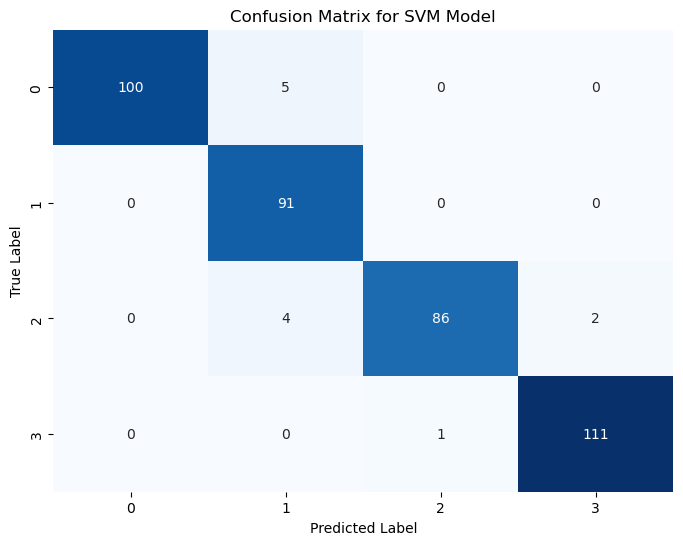

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM model
svm_model = SVC()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
}

# Create GridSearchCV object with SVM model and hyperparameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Predictions on the testing data using the best SVM model
svm_y_pred = best_svm_model.predict(X_test)

# Evaluate the best SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_classification_report_output = classification_report(y_test, svm_y_pred)
conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Display the evaluation metrics for the best SVM model
print(f'Best SVM Accuracy: {svm_accuracy:.2f}')
print('Best SVM Parameters:', grid_search_svm.best_params_)
print('\nBest SVM Classification Report:\n', svm_classification_report_output)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Insights

Based on the SVM with Hyperparameter Tuning, The model achieved a 97% accuracy, which higher performance compared to the Logistic Regression model and XGBoost.

# Important features for determining selling price

In [40]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.484551
1,battery_power,0.075330
2,px_width,0.055578
3,px_height,0.055517
4,mobile_wt,0.038888


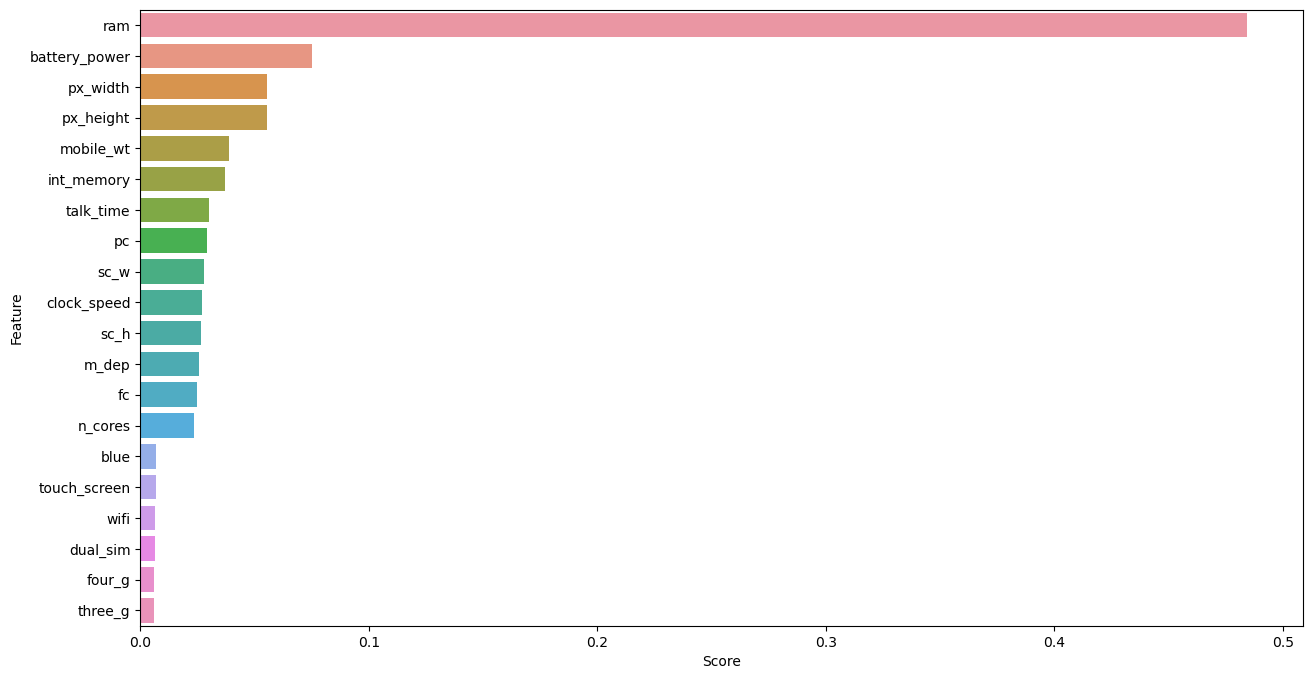

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

## Which ML model did you choose for your final prediction model and why?

We will implement SVM with hyper parameter tuning model as it predicts better than Logistic regression and XGB models

##  What features do you think Bob should focus on for determining the selling price?

 As per the feature importance score, we would suggest 5 features to be focused for determining the selling price
 1) RAM
 2) Battery Power
 3) Pix Height
 4) Pix Width
 5) Mobile Weight

# Conclusion

The exploratory data analysis (EDA) revealed that the dataset includes mobile phones categorized into four price ranges, each with a balanced distribution. Approximately half of the devices have Bluetooth, while the rest do not. Notably, battery power increases gradually with the price range, and higher-priced phones tend to have more RAM and lighter weights.

Key findings indicate that RAM, battery power, and pixel quality significantly influence mobile phone prices. Support Vector Machine with hyperparameter tuning emerged as the most effective model for predicting price ranges.

In summary, the EDA highlighted a balanced distribution across price ranges, a 50-50 split in Bluetooth prevalence, and notable trends in battery power, RAM, and weight concerning price. The experiments underscored the importance of RAM, battery power, and pixel quality, with Support Vector Machine proving optimal for predicting mobile phone prices.